In [1]:
#Loading important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")
import os as os

from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [240]:
#loading the Workspace
os.chdir("C:\\Data\\DSP\\Capstone\\WinPrediction\\Win Prediction")

In [273]:
#Importing the dataset
df = pd.read_excel("Win_Prediction_Data.xlsx")

In [274]:
#Overview of Data
df.head()

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Client_Category  9982 non-null   object        
 1   Solution_Type    10061 non-null  object        
 2   Deal_Date        10061 non-null  datetime64[ns]
 3   Sector           10061 non-null  object        
 4   Location         10061 non-null  object        
 5   VP_Name          10061 non-null  object        
 6   Manager_Name     10061 non-null  object        
 7   Deal_Cost        10061 non-null  float64       
 8   Deal_Status      10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [276]:
df.describe(include="object")

,Client_Category,Solution_Type,Sector,Location,VP_Name,Manager_Name,Deal_Status
count,9982,10061,10061,10061,10061,10061,10061
unique,41,67,25,13,43,278,2
top,Others,Solution 32,Sector 23,L10,Mervin Harwood,Molly Eakes,Lost
freq,1763,1439,2693,3360,1166,323,6306


# Exploratory Data Analysis

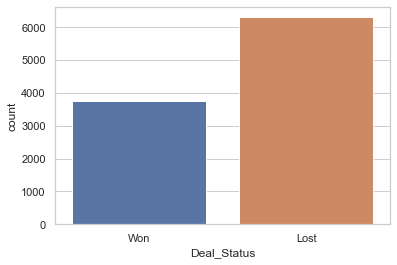

In [277]:
#Counting Win Loss Cases
sns.countplot(df["Deal_Status"]);

#We can observe Loss Cases are higher than win cases

In [278]:
# let's find the most frequent categories for the variable Client Category

df["Client_Category"].value_counts()

Others                   1763
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [279]:
# Finding the most Client Category with Higesh Win%

report = pd.crosstab(df["Client_Category"],df["Deal_Status"])
report['Total'] = (report['Won']+report['Lost'])
report['win%'] = (report['Won']*100)/(report['Total'])
report.sort_values(by=['win%'],ascending = False)

Deal_Status,Lost,Won,Total,win%
Client_Category,,,,
Share_market,4,10,14,71.428571
Internal,694,760,1454,52.269601
Management,22,21,43,48.837209
Consulting,182,170,352,48.295455
Consumer Good,98,87,185,47.027027
Holding,14,11,25,44.000000
Energy,32,25,57,43.859649
International Bank,216,160,376,42.553191
Power ind,152,112,264,42.424242


From the Above Table we can observe, "internal" project have a veruu high percentage of win. We would need to remove the internal category as it would skew the data towards WIN cases.

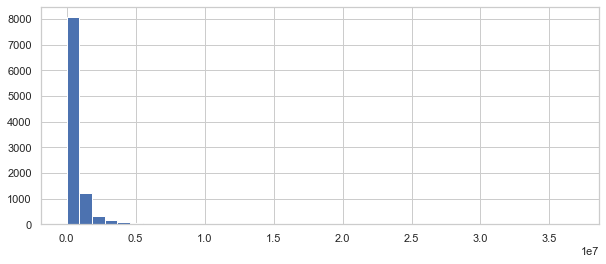

In [280]:
#Analysing the Deal Cost
df['Deal_Cost'].hist(bins = 40, figsize = (10,4));

From the above Grapgh we can see that majority of the deals are below 0.5 Million USD. Thus the data is right skewed.

In [281]:
#Analysing Deal Cost
df['Deal_Cost'].describe()

count    1.006100e+04
mean     7.668969e+05
std      1.619894e+06
min      0.000000e+00
25%      1.897059e+05
50%      3.823529e+05
75%      7.647059e+05
max      3.676471e+07
Name: Deal_Cost, dtype: float64

In [282]:
#Deal year
df['Deal_Year'] = pd.DatetimeIndex(df['Deal_Date']).year

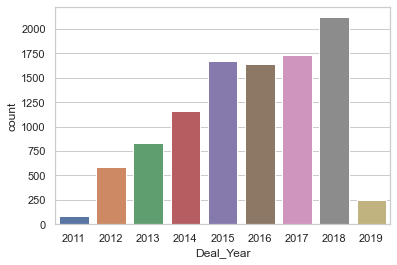

In [283]:
sns.countplot(df["Deal_Year"]);

From the above plot we can observe that the number of deals are increasing every year, and we dont have complete data for 2019.

In [284]:
df.groupby('Deal_Status')[['Deal_Cost']].agg(["count","median"])

Deal_Cost           
                count     median
Deal_Status                     
Lost             6306  426470.59
Won              3755  345000.00

From the above table we can observe that the Median for Loss deals is higher than median for Won Deals, thus the organization
is winning smaller deals and losing higher value deals.

# Data Cleansing

In [285]:
#Checking for Null values
df.isnull().sum()

Client_Category    79
Solution_Type       0
Deal_Date           0
Sector              0
Location            0
VP_Name             0
Manager_Name        0
Deal_Cost           0
Deal_Status         0
Deal_Year           0
dtype: int64

In [286]:
#Removing Duplicates Values 

df.drop_duplicates(subset=None, keep='first', inplace=True)

In [287]:
#Replacing Blanks in Client Category with Others
df["Client_Category"].fillna("Others",inplace = True)

In [288]:
#calculating mean of lost deals
median = df[df['Deal_Cost']!=0].groupby('Deal_Status').median().iloc[0]['Deal_Cost']
median

441176.47

In [289]:
#filling zero deal cost values with median deal cost of all lost deals

def Deal_Cost_Median(Deal_Cost):
    if Deal_Cost == 0:
        return median
    else:
        return Deal_Cost
    
df["Deal_Cost"] = df["Deal_Cost"].apply(Deal_Cost_Median)  

In [290]:
#Removing the Internal Data from the dataframe
df = df[df["Client_Category"]!="Internal"]

In [291]:
#Checking for Null values
df.isnull().sum()

Client_Category    0
Solution_Type      0
Deal_Date          0
Sector             0
Location           0
VP_Name            0
Manager_Name       0
Deal_Cost          0
Deal_Status        0
Deal_Year          0
dtype: int64

In [292]:
#Checking if there are any "0" Deal Cost values
df.isin([0]).sum()

Client_Category    0
Solution_Type      0
Deal_Date          0
Sector             0
Location           0
VP_Name            0
Manager_Name       0
Deal_Cost          0
Deal_Status        0
Deal_Year          0
dtype: int64

# Transforming Variables

In [293]:
#Encoding "Won" as 1, and "Lost" as "0"
def Deal_status_Code(Deal_Status):
    if Deal_Status == "Won":
        return 1
    else:
        return 0

In [294]:
df["Deal_Status"] = df["Deal_Status"].apply(Deal_status_Code)

In [295]:
df.head()

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status,Deal_Year
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,1,2012
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,1,2012
7,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,0,2012
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,1,2012
10,International Bank,Solution 6,2012-02-11,Sector 2,L10,Long Bergstrom,Luv Malhotra,316176.47,1,2012


In [296]:
#Combining "VP Name" and "Manager Name" to create a New Colum "VP+Manager"
df["VP+Manager"] = df["VP_Name"]+" "+df["Manager_Name"]

In [297]:
#Droping Unrequired columns
df.drop('VP_Name',axis=1,inplace=True)
df.drop('Manager_Name',axis=1,inplace=True)
df.drop('Deal_Year',axis=1,inplace=True)
df.drop('Deal_Date',axis=1,inplace=True)

In [298]:
#Final data set

df.head()

,Client_Category,Solution_Type,Sector,Location,Deal_Cost,Deal_Status,VP+Manager
0,Telecom,Solution 7,Sector 24,L5,150000.00,1,Ekta Zutshi Gopa Trilochana
1,Telecom,Solution 7,Sector 24,L5,744705.88,1,Ekta Zutshi Gopa Trilochana
7,Govt,Solution 7,Sector 13,L5,409705.88,0,Sargar Deep Rao Vidur Hukle
8,Consumer Good,Solution 42,Sector 12,L10,1032352.94,1,Lilli Storrs Md. Daud
10,International Bank,Solution 6,Sector 2,L10,316176.47,1,Long Bergstrom Luv Malhotra


In [299]:
#creating a copy of the dataset for further use
org_df = df.copy()

# Feature Engineering

Performing Target Guided Ordinal Encoding

In [300]:
#Separating the Categorical variables
col = ['Client_Category', 'Solution_Type', 'Sector', 'Location','VP+Manager']

In [301]:
#Converting to Target Guided Ordinal Encoding
for feature in col:
    ordinal_labels_1 = df.groupby(feature)['Deal_Status'].mean().sort_values().index
    ordinal_labels_2={k:i for i,k in enumerate(ordinal_labels_1,0)}
    df[feature]=df[feature].map(ordinal_labels_2)

df.head(10)    

,Client_Category,Solution_Type,Sector,Location,Deal_Cost,Deal_Status,VP+Manager
0,29,31,17,11,150000.00,1,593
1,29,31,17,11,744705.88,1,593
7,16,31,1,11,409705.88,0,420
8,36,41,7,6,1032352.94,1,754
10,33,23,11,6,316176.47,1,511
11,8,27,11,10,929411.77,1,367
12,20,27,11,11,2367647.06,1,340
13,19,27,19,11,8823529.41,0,210
14,20,51,21,11,122058.82,0,547
15,23,49,18,12,529411.77,0,435


In [302]:
#Separating Independent and Dependent Features
data = df.copy()
X = data.drop("Deal_Status", axis = 1)
Y = data["Deal_Status"]

# Splitting the Data

In [303]:
#Defining the Variables
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=102)

In [304]:
#X_train.to_csv("X_Training_Data.csv",index=False)
#X_test.to_csv("X_Test_Data.csv",index=False)
#y_train.to_csv("y_Training_Data.csv",index=False)
#y_test.to_csv("y_Test_Data.csv",index=False)

In [305]:
#Fixed Train and test data after random split (80:20) to get same output after restarting kernel
X_train = pd.read_csv("X_Training_Data.csv")
X_test = pd.read_csv("X_Test_Data.csv")
y_train = pd.read_csv("y_Training_Data.csv")
y_test = pd.read_csv("y_Test_Data.csv")

In [306]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.01669321, 0.02531758, 0.00389979, 0.0123561 , 0.06849117,
       0.12976539])

In [307]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

VP+Manager         0.129765
Deal_Cost          0.068491
Solution_Type      0.025318
Client_Category    0.016693
Location           0.012356
Sector             0.003900
dtype: float64

<AxesSubplot:>

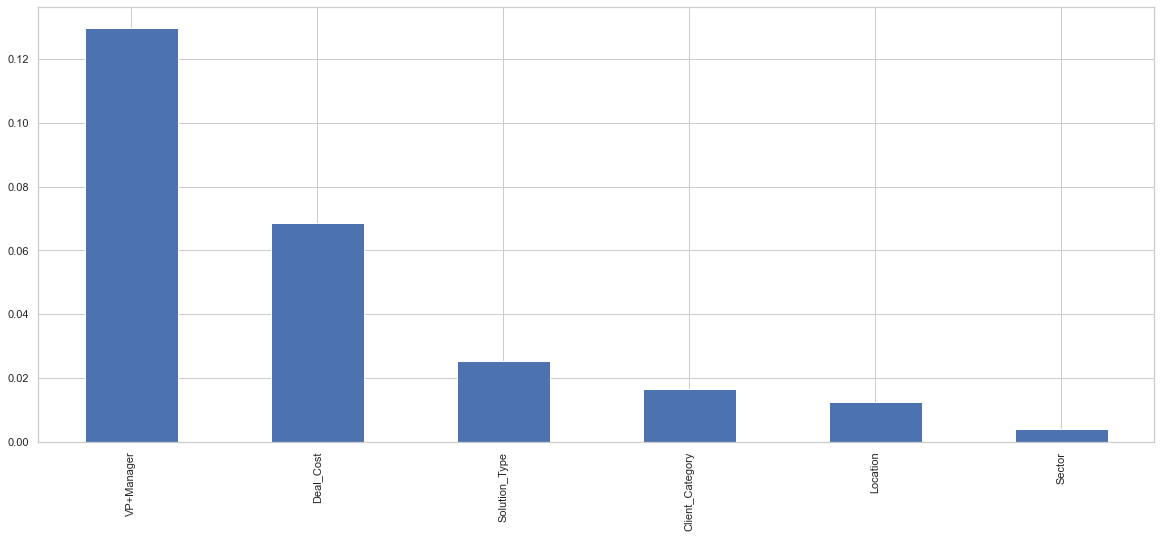

In [308]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

From the above plot we can see, VP+Manager is the most important variable

# Models

# Logistic Regression

In [309]:
from sklearn.linear_model import LogisticRegression

In [310]:
#intializing LogisticRegression to object logmodel

logmodel = LogisticRegression()

In [311]:
##Hyperparameter Optimization

from sklearn.model_selection import RandomizedSearchCV

# Create params

params = {'penalty' : ['l1', 'l2'], 
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear','sag','saga']}

In [312]:
log_randomcv = RandomizedSearchCV(logmodel,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [313]:
log_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.1s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'sag', 'saga']},
                   scoring='roc_auc', verbose=3)

In [314]:
lg_model = log_randomcv.best_estimator_

In [315]:
#prediction
lg_prediction = lg_model.predict(X_test)

In [316]:
# getting the probabilities of our predictions
log_scores = lg_model.predict_proba(X_train)
log_scores = log_scores[:,1]

# Evaluation Metrics for Logistic Regression

In [317]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [318]:
print(confusion_matrix(y_test,lg_prediction))
print(accuracy_score(y_test,lg_prediction))
print(classification_report(y_test,lg_prediction))

[[979 141]
 [292 308]]
0.7482558139534884
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1120
           1       0.69      0.51      0.59       600

    accuracy                           0.75      1720
   macro avg       0.73      0.69      0.70      1720
weighted avg       0.74      0.75      0.74      1720



In [319]:
lg_model.score(X_train,y_train)

0.745782431646306

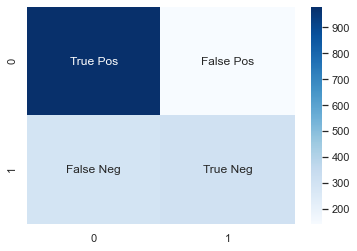

In [320]:
cf_matrix_log_reg = confusion_matrix(y_test,lg_prediction)
labels = ['True Pos','False Pos','False Neg','True Neg']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_log_reg, annot=labels, fmt='', cmap='Blues');

In [321]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, log_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.7999369176001293


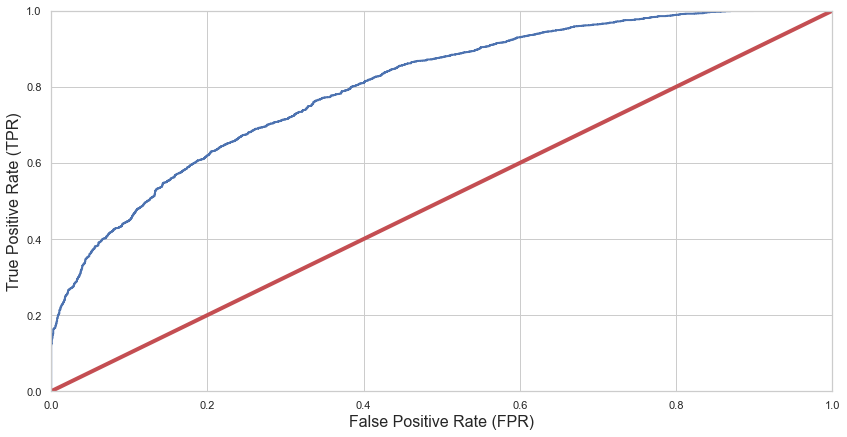

In [322]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, log_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [323]:
report = y_test.copy()
report["Prediction"]= lg_prediction
report["Deal Cost"] = X_test["Deal_Cost"]

In [324]:
true_loss_log = report[(report['Deal_Status'] == 1) & (report['Prediction'] == 0)].sum()

In [325]:
true_loss_log['Deal Cost']

221352647.20999998

# Decision Tree

In [326]:
from sklearn.tree import DecisionTreeClassifier

In [327]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
DT_pred = decision_tree.predict(X_test)

In [328]:
DT_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [329]:
# getting the probabilities of our predictions
dt_scores = decision_tree.predict_proba(X_train)
dt_scores = dt_scores[:,1]

In [330]:
y_test

,Deal_Status
0,0
1,0
2,1
3,0
4,0
...,...
1715,0
1716,1
1717,0
1718,0


#  Evaluation Metrics for Decision Tree

In [331]:
print(confusion_matrix(y_test,DT_pred))
print(accuracy_score(y_test,DT_pred))
print(classification_report(y_test,DT_pred))

[[1056   64]
 [ 209  391]]
0.8412790697674418
              precision    recall  f1-score   support

           0       0.83      0.94      0.89      1120
           1       0.86      0.65      0.74       600

    accuracy                           0.84      1720
   macro avg       0.85      0.80      0.81      1720
weighted avg       0.84      0.84      0.84      1720



In [332]:
decision_tree.score(X_train,y_train)

0.997673065735893

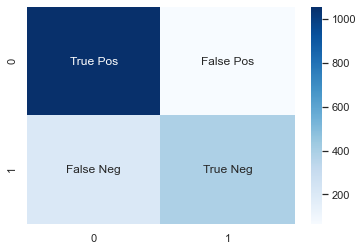

In [333]:
cf_matrix_dt = confusion_matrix(y_test,DT_pred)
labels = ['True Pos','False Pos','False Neg','True Neg']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_dt, annot=labels, fmt='', cmap='Blues');

In [334]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, dt_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9999849981294251


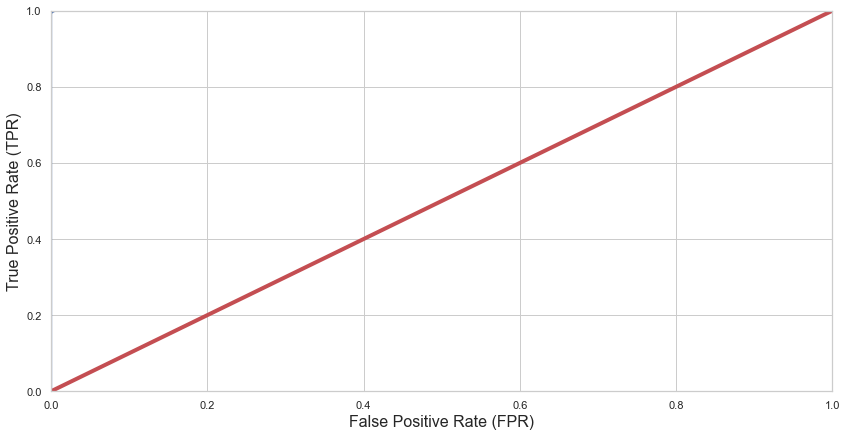

In [335]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, dt_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [336]:
report = y_test.copy()
report["Prediction"]= DT_pred
report["Deal Cost"] = X_test["Deal_Cost"]

In [337]:
true_loss_dt = report[(report['Deal_Status'] == 1) & (report['Prediction'] == 0)].sum()
true_loss_dt['Deal Cost']

135801470.64999998

# XGBoost

In [338]:
import xgboost
classifier=xgboost.XGBClassifier()

In [339]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [340]:
xg_randomcv = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [341]:
xg_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.2s finished


[20:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [342]:
#best model from random search cv
xg_model = xg_randomcv.best_estimator_

In [343]:
#making prediction
xg_predictions = xg_model.predict(X_test)

In [344]:
xg_predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [345]:
# getting the probabilities of our predictions
xg_scores = xg_model.predict_proba(X_train)
xg_scores = xg_scores[:,1]

 # Evaluation Metrics for XGBoost

In [346]:
print(confusion_matrix(y_test,xg_predictions))
print(accuracy_score(y_test,xg_predictions))
print(classification_report(y_test,xg_predictions))

[[1069   51]
 [ 207  393]]
0.85
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1120
           1       0.89      0.66      0.75       600

    accuracy                           0.85      1720
   macro avg       0.86      0.80      0.82      1720
weighted avg       0.85      0.85      0.84      1720



In [347]:
xg_model.score(X_train,y_train)

0.9845840605002909

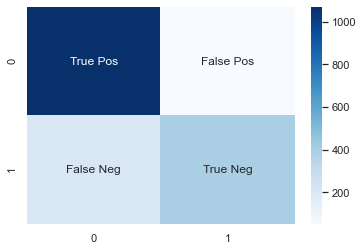

In [348]:
cf_matrix_xgboost = confusion_matrix(y_test,xg_predictions)
labels = ['True Pos','False Pos','False Neg','True Neg']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_xgboost, annot=labels, fmt='', cmap='Blues');

In [349]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, xg_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.998808422851483


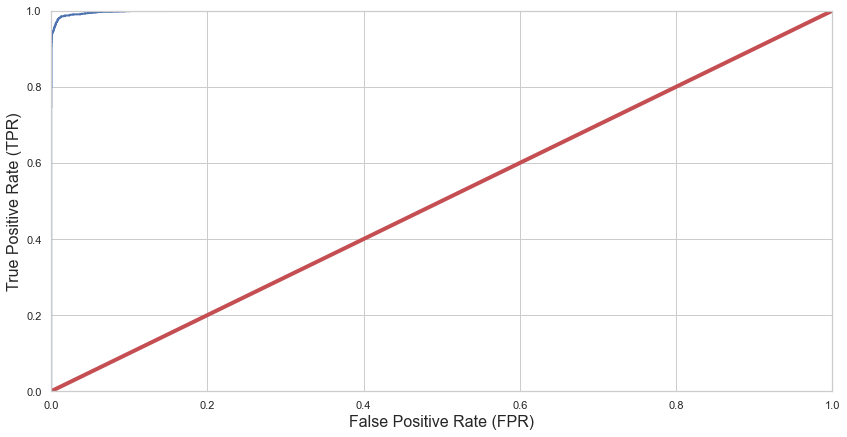

In [350]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, xg_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [351]:
report = y_test.copy()
report["Prediction"]= xg_predictions
report["Deal Cost"] = X_test["Deal_Cost"]

In [352]:
true_loss_xg = report[(report['Deal_Status'] == 1) & (report['Prediction'] == 0)].sum()
true_loss_xg['Deal Cost']

135965000.11

# Random Forest

In [353]:
from sklearn.ensemble import RandomForestClassifier

In [354]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

rf_prediction = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [355]:
# getting the probabilities of our predictions
rf_scores = random_forest.predict_proba(X_train)
rf_scores = rf_scores[:,1]

# Evaluation Metrics for Random Forest

In [356]:
print(confusion_matrix(y_test,rf_prediction))
print(accuracy_score(y_test,rf_prediction))
print(classification_report(y_test,rf_prediction))

[[1072   48]
 [ 224  376]]
0.8418604651162791
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1120
           1       0.89      0.63      0.73       600

    accuracy                           0.84      1720
   macro avg       0.86      0.79      0.81      1720
weighted avg       0.85      0.84      0.83      1720



In [357]:
random_forest.score(X_train, y_train)

0.9975276323443862

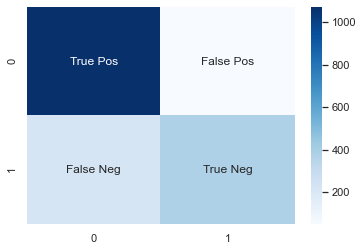

In [358]:
cf_matrix_ran_for = confusion_matrix(y_test,rf_prediction)
labels = ['True Pos','False Pos','False Neg','True Neg']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_ran_for, annot=labels, fmt='', cmap='Blues');

In [359]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, rf_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.99996170329934


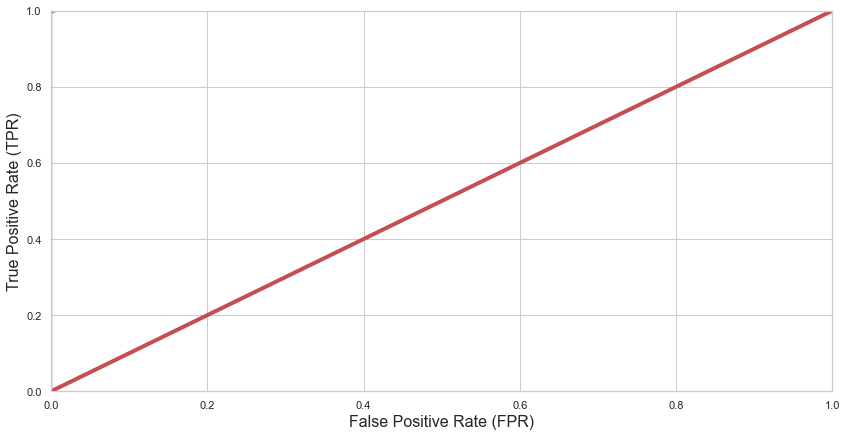

In [360]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, rf_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [361]:
report = y_test.copy()
report["Prediction"]= rf_prediction
report["Deal Cost"] = X_test["Deal_Cost"]

In [362]:
true_loss_rf = report[(report['Deal_Status'] == 1) & (report['Prediction'] == 0)].sum()
true_loss_rf['Deal Cost']

143135294.19

# Comparison of Models

In [363]:
comp_col = ["Model Name","Accuracy","Precision (Weighted)","True Loss"]


In [364]:
Model_Name = ['Logistic Regression','Decision Tree', 'XGBoost','Random Forest']

In [365]:
Accuracy = [round(lg_model.score(X_test, y_test),2),round(decision_tree.score(X_test, y_test),2),
            round(xg_model.score(X_test, y_test),2),round(random_forest.score(X_test, y_test),2)]

In [366]:
Precision = [round(precision_recall_fscore_support(y_test, lg_prediction, average='weighted')[0],2),
               round(precision_recall_fscore_support(y_test, DT_pred, average='weighted')[0],2),
               round(precision_recall_fscore_support(y_test, xg_predictions, average='weighted')[0],2),
               round(precision_recall_fscore_support(y_test, rf_prediction, average='weighted')[0],2)]

In [367]:
True_Loss = [true_loss_log['Deal Cost'],true_loss_dt['Deal Cost'],true_loss_xg['Deal Cost'],true_loss_rf['Deal Cost']]

In [368]:
comp = (Model_Name,Accuracy,Precision,True_Loss)

In [369]:
comp_df = pd.DataFrame(comp,)

In [370]:
comparison_df = pd.DataFrame(data=list(zip(Model_Name, Accuracy,Precision,True_Loss)),columns=comp_col)

In [371]:
comparison_df

,Model Name,Accuracy,Precision (Weighted),True Loss
0,Logistic Regression,0.75,0.74,2.213526e+08
1,Decision Tree,0.84,0.84,1.358015e+08
2,XGBoost,0.85,0.85,1.359650e+08
3,Random Forest,0.84,0.85,1.431353e+08


# Conclusion

As we can see from the above Table, Accuracy and Precision for all the models is near to 85%, except for logistic regression.

We can see that the least True Loss if observed from XGBoost

# Prescriptive Analysis

In [372]:
#immporting Original df
org_df.head()

,Client_Category,Solution_Type,Sector,Location,Deal_Cost,Deal_Status,VP+Manager
0,Telecom,Solution 7,Sector 24,L5,150000.00,1,Ekta Zutshi Gopa Trilochana
1,Telecom,Solution 7,Sector 24,L5,744705.88,1,Ekta Zutshi Gopa Trilochana
7,Govt,Solution 7,Sector 13,L5,409705.88,0,Sargar Deep Rao Vidur Hukle
8,Consumer Good,Solution 42,Sector 12,L10,1032352.94,1,Lilli Storrs Md. Daud
10,International Bank,Solution 6,Sector 2,L10,316176.47,1,Long Bergstrom Luv Malhotra


In [373]:
#Calculating total no. of deals for each VP+Manager pair and converting it to a dataframe
new_df=pd.DataFrame({'VP+Manager':org_df['VP+Manager'].value_counts().index, 'total_deals':org_df['VP+Manager'].value_counts().values})

In [374]:
new_df

,VP+Manager,total_deals
0,Rahul Bajpai Rudraksh Sharma,197
1,Long Bergstrom Jewell Tunstall,118
2,Sargar Deep Rao Manpreet Singh,114
3,Ankita Aggarwal Desmond Krout,114
4,Ankita Aggarwal Manish Saundriyal,108
...,...,...
892,Jewell Tunstall pooran chand,1
893,Gopa Trilochana Anmol Mehre,1
894,Varsha Arora Rahul Singh,1
895,Man Suddeth kailash kumar,1


In [375]:
#Selecting the Won Data
won_data=org_df.loc[org_df['Deal_Status']==1]

In [376]:
won_data.head()

,Client_Category,Solution_Type,Sector,Location,Deal_Cost,Deal_Status,VP+Manager
0,Telecom,Solution 7,Sector 24,L5,150000.00,1,Ekta Zutshi Gopa Trilochana
1,Telecom,Solution 7,Sector 24,L5,744705.88,1,Ekta Zutshi Gopa Trilochana
8,Consumer Good,Solution 42,Sector 12,L10,1032352.94,1,Lilli Storrs Md. Daud
10,International Bank,Solution 6,Sector 2,L10,316176.47,1,Long Bergstrom Luv Malhotra
11,Domestic Public Bank,Solution 59,Sector 2,L11,929411.77,1,Mervin Harwood Lino Batterton


In [377]:
#Finding number of wion deals for each VP+Manager pair
won_win=pd.DataFrame({'VP+Manager':won_data['VP+Manager'].value_counts().index, 'won_deals':won_data['VP+Manager'].value_counts().values})

In [378]:
won_win

,VP+Manager,won_deals
0,Rahul Bajpai Rudraksh Sharma,71
1,Long Bergstrom Russell Dahlen,64
2,neeraj kumar Vinay Kumar,46
3,neeraj kumar Molly Eakes,39
4,Sargar Deep Rao Manpreet Singh,38
...,...,...
630,Ankita Aggarwal Vincenzo Mushrush,1
631,Long Bergstrom Ganesh Malwar,1
632,Rudraksh Sharma sunder paal,1
633,neeraj kumar Abhinav Warrier,1


In [379]:
#Adding the Won Details to the New Dataframe
new_df['won_deals']=np.NaN
i=0
j=0

In [380]:
for i in range(won_win.shape[0]):
    for j in range(new_df.shape[0]):
        if won_win['VP+Manager'].loc[i]==new_df['VP+Manager'].loc[j]:
            new_df['won_deals'].loc[j]=won_win['won_deals'].loc[i]

In [381]:
new_df['won_deals']=new_df['won_deals'].replace(np.NaN,0)

In [382]:
new_df['%Win']=np.NaN
k=0

In [383]:
#calculating Win % for Each Pair
for k in range(new_df.shape[0]):
    new_df['%Win'].loc[k]=((new_df['won_deals'].loc[k]/new_df['total_deals'].loc[k])*100)

In [391]:
new_df

,VP+Manager,total_deals,won_deals,%Win,Support,Efficiency
8,Long Bergstrom Russell Dahlen,92,64.0,69.565217,0.021369,1.486536
16,neeraj kumar Vinay Kumar,68,46.0,67.647059,0.015359,1.038987
47,Ekta Zutshi neeraj kumar,40,34.0,85.000000,0.011352,0.964942
0,Rahul Bajpai Rudraksh Sharma,197,71.0,36.040609,0.023706,0.854385
24,Ekta Zutshi Jean Sappington,57,35.0,61.403509,0.011686,0.717570
...,...,...,...,...,...,...
627,som dutt Marcella Mo,2,0.0,0.000000,0.000000,0.000000
626,Rosanna Maynez rahul kumar,2,0.0,0.000000,0.000000,0.000000
375,Rosanna Maynez Devendra Vishvakarma,5,0.0,0.000000,0.000000,0.000000
624,Son Mcconnaughy Danny Bolton,2,0.0,0.000000,0.000000,0.000000


In [384]:
#Calculating Support as - (Won Deals of Pair)/(Total Won Deals)
new_df['Support'] = (new_df['won_deals'])/(new_df['won_deals'].sum())

In [385]:
new_df['won_deals'].sum()

2995.0

In [386]:
new_df

,VP+Manager,total_deals,won_deals,%Win,Support
0,Rahul Bajpai Rudraksh Sharma,197,71.0,36.040609,0.023706
1,Long Bergstrom Jewell Tunstall,118,38.0,32.203390,0.012688
2,Sargar Deep Rao Manpreet Singh,114,38.0,33.333333,0.012688
3,Ankita Aggarwal Desmond Krout,114,24.0,21.052632,0.008013
4,Ankita Aggarwal Manish Saundriyal,108,18.0,16.666667,0.006010
...,...,...,...,...,...
892,Jewell Tunstall pooran chand,1,1.0,100.000000,0.000334
893,Gopa Trilochana Anmol Mehre,1,1.0,100.000000,0.000334
894,Varsha Arora Rahul Singh,1,1.0,100.000000,0.000334
895,Man Suddeth kailash kumar,1,1.0,100.000000,0.000334


In [387]:
#Creating a New variable Efficiency as win%*Support, to remove bias
new_df['Efficiency'] = (new_df['%Win'])*(new_df['Support'])

In [388]:
new_df

,VP+Manager,total_deals,won_deals,%Win,Support,Efficiency
0,Rahul Bajpai Rudraksh Sharma,197,71.0,36.040609,0.023706,0.854385
1,Long Bergstrom Jewell Tunstall,118,38.0,32.203390,0.012688,0.408591
2,Sargar Deep Rao Manpreet Singh,114,38.0,33.333333,0.012688,0.422927
3,Ankita Aggarwal Desmond Krout,114,24.0,21.052632,0.008013,0.168702
4,Ankita Aggarwal Manish Saundriyal,108,18.0,16.666667,0.006010,0.100167
...,...,...,...,...,...,...
892,Jewell Tunstall pooran chand,1,1.0,100.000000,0.000334,0.033389
893,Gopa Trilochana Anmol Mehre,1,1.0,100.000000,0.000334,0.033389
894,Varsha Arora Rahul Singh,1,1.0,100.000000,0.000334,0.033389
895,Man Suddeth kailash kumar,1,1.0,100.000000,0.000334,0.033389


In [389]:
new_df = new_df.sort_values('Efficiency',ascending=False)

In [390]:
#Printing the Best Recommendation of VP Head + Managers
new_df.head(5)

,VP+Manager,total_deals,won_deals,%Win,Support,Efficiency
8,Long Bergstrom Russell Dahlen,92,64.0,69.565217,0.021369,1.486536
16,neeraj kumar Vinay Kumar,68,46.0,67.647059,0.015359,1.038987
47,Ekta Zutshi neeraj kumar,40,34.0,85.000000,0.011352,0.964942
0,Rahul Bajpai Rudraksh Sharma,197,71.0,36.040609,0.023706,0.854385
24,Ekta Zutshi Jean Sappington,57,35.0,61.403509,0.011686,0.717570
